## Installing Required Python Packages

Note: run the following cell once. 

In [1]:
# !pip install -r requirements.txt

## Importing essential Python Packages

In [1]:
import sys
sys.path.insert(0, "../")

from pysbf import *

from IPython.display import display, Markdown, clear_output
warnings.filterwarnings('ignore')

# %matplotlib notebook
# %matplotlib notebook

In [2]:
#https://math.stackexchange.com/questions/1114879/detect-if-two-ellipses-intersect

## Object Initialization

In [3]:
## This is the folder that holds recent observations by wfc3 on HST in a SNAP program

inFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/'
configFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/config/'


# Input

### Object Name

In [5]:
name = "u03396"

### Do NOT change the following cells

unless there are some naming issues, and the files are in other locations
other than what has been set up autoamtically. 

In [6]:
inFolder = inFolder + '/'
config   = configFolder + '/'

outFolder = "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"


In [7]:
if exists(logFile):
    with open(logFile, 'r') as f:
        line = f.readline()

    if line.strip("#").strip()[:4] == "uuid":
        old_uuid = line.strip("#").split(":")[1].strip()                   
        if os.path.isdir(outFolder+name+"_"+old_uuid):
            uuid = old_uuid
            params = get_obj_params(open_log_df(logFile))

else:
    print("There is no log-file. \nPlease run elliprof to generate the log file and the relevant plots.")
    print("Elliprof notebook name: \"Run_elliprof_function.ipynb\"")

In [8]:
df_log = open_log_df(logFile)
sky_med = float(df_log.loc["initial_sky_med"].value)

df_log

,value,description
uuid,d343d60ea411,Unique Identifier Code
User,Ehsan,User Name
Time,2022-07-20 22:01:29.567015,Modification Time
Name,u03396,Object Name
X_pixels,1022,X-dimension of image [pixel]
Y_pixels,1025,Y-dimension of image [pixel]
R_max,458,maximum horizontal/vertical distance from cent...
X0,563.268,Object Center X0 [pixel]
Y0,563.234,Object Center Y0 [pixel]
a,88.829,semi-major axis [pixel]


In [9]:
df = open_log_df(logFile)
obj_uuid = df.loc['uuid'].value
objRoot = outFolder+name+'_'+obj_uuid+'/'

(-0.5, 1079.5, 287.5, -0.5)

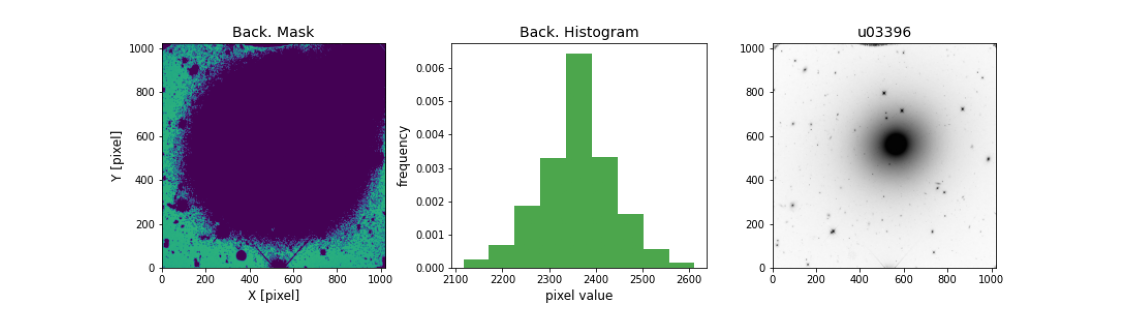

In [31]:
_, ax = plt.subplots(figsize=(20,10))
im = img.imread(objRoot+name+"_initial_back.png")
ax.imshow(im)
plt.axis('off')

(-0.5, 1151.5, 287.5, -0.5)

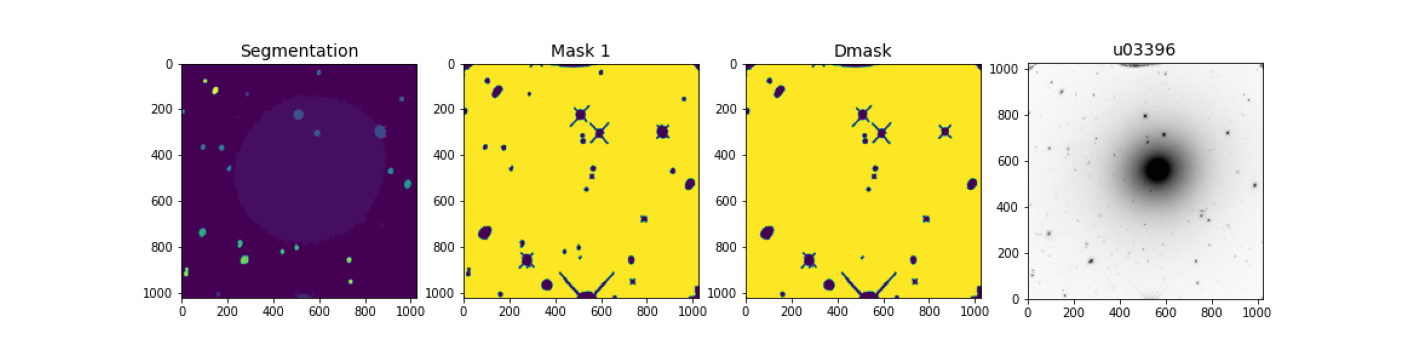

In [32]:
_, ax = plt.subplots(figsize=(25,10))
im = img.imread(objRoot+name+"_initial_mask.png")
ax.imshow(im)
plt.axis('off')

(-0.5, 1151.5, 287.5, -0.5)

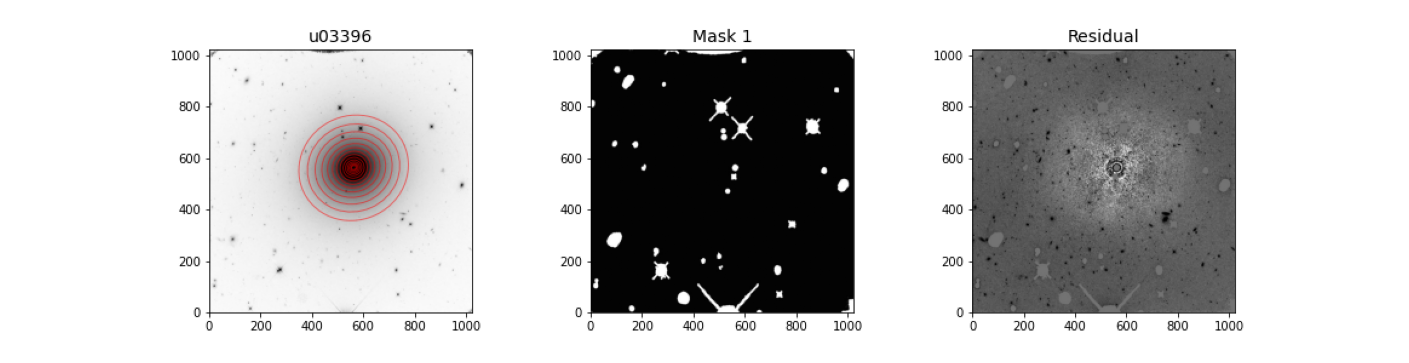

In [33]:
_, ax = plt.subplots(figsize=(25,10))
im = img.imread(objRoot+name+"_basic_model.png")
ax.imshow(im)
plt.axis('off')

In [20]:
outFolder

'Outputs_u03396/'

In [21]:
uuid

'd343d60ea411'

(-0.5, 935.5, 935.5, -0.5)

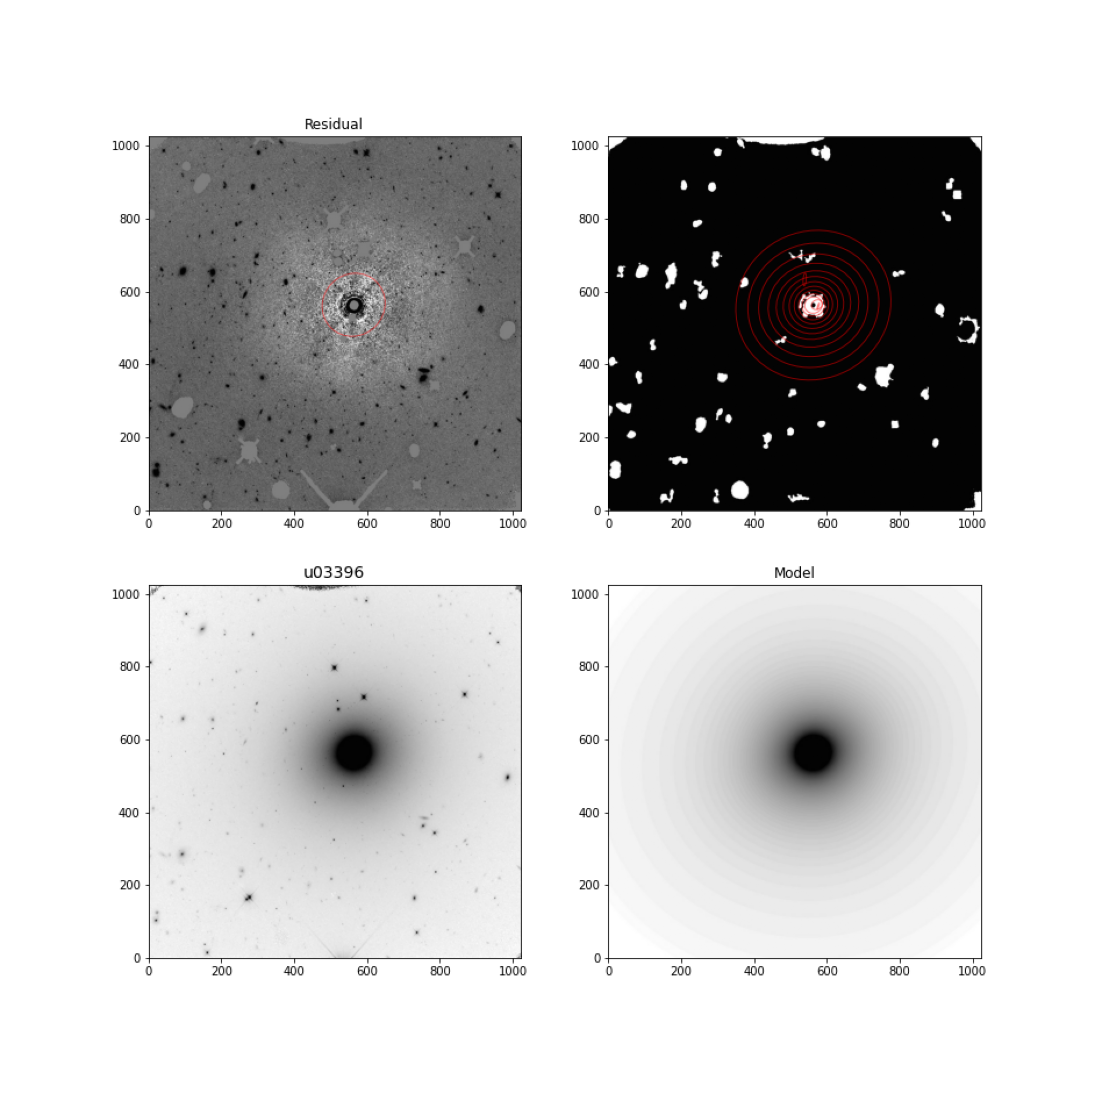

In [35]:
_, ax = plt.subplots(figsize=(20,20))
im = img.imread(objRoot+name+"_initial_model.png")
ax.imshow(im)
plt.axis('off')

(-0.5, 359.5, 359.5, -0.5)

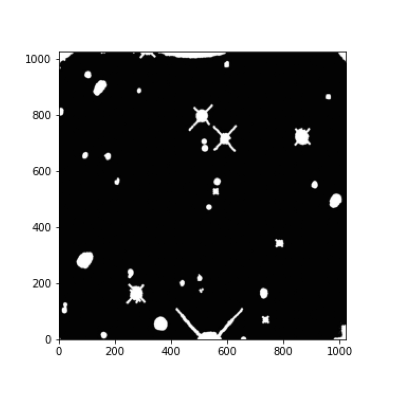

In [14]:
_, ax = plt.subplots(figsize=(7,7))

figName = objRoot+'/'+name+'_combined_mask.png'
im = img.imread(figName)
ax.imshow(im)
plt.axis('off')

(-0.5, 863.5, 359.5, -0.5)

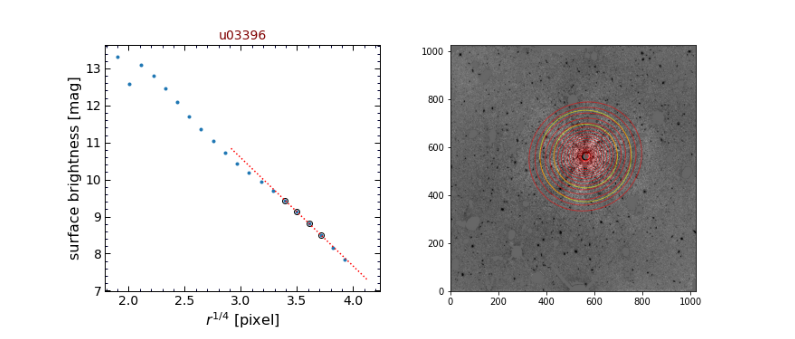

In [15]:
_, ax = plt.subplots(figsize=(14,7))

figName = objRoot+'/'+name+'_light_profile.png'
im = img.imread(figName)
ax.imshow(im)
plt.axis('off')

(-0.5, 719.5, 287.5, -0.5)

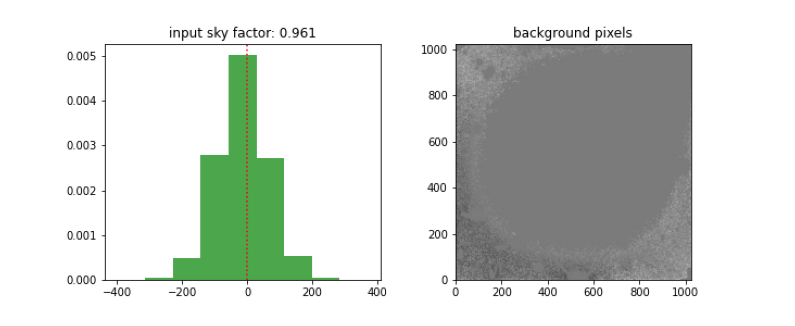

In [16]:
_, ax = plt.subplots(figsize=(14,7))

figName = objRoot+'/'+name+'_updated_back.png'
im = img.imread(figName)
ax.imshow(im)
plt.axis('off')

    r0   r1  nr  n_cross  final_sky_factor  final_sky  model_no
0   13  322  26        3              0.92       2172       999
1   13  275  19        0              0.95       2236       998
2   14  375  33        1              0.88       2087       997
3   12  306  23        2              0.93       2209       996
4    8  350  24        2              0.93       2206       995
5    8  428  32        3              0.90       2130       994
6    9  237  16        3              0.96       2274       993
7   10  207  25        2              0.97       2282       992
8   14  277  22        0              0.96       2262       991
9    8  322  26        0              0.92       2166       990
10  13  428  32        2              0.94       2221       989
11  12  272  29        1              0.96       2276       988
[SKY factor] median: 0.935
[SKY] median: 2210
[SKY] standard deviation : 61


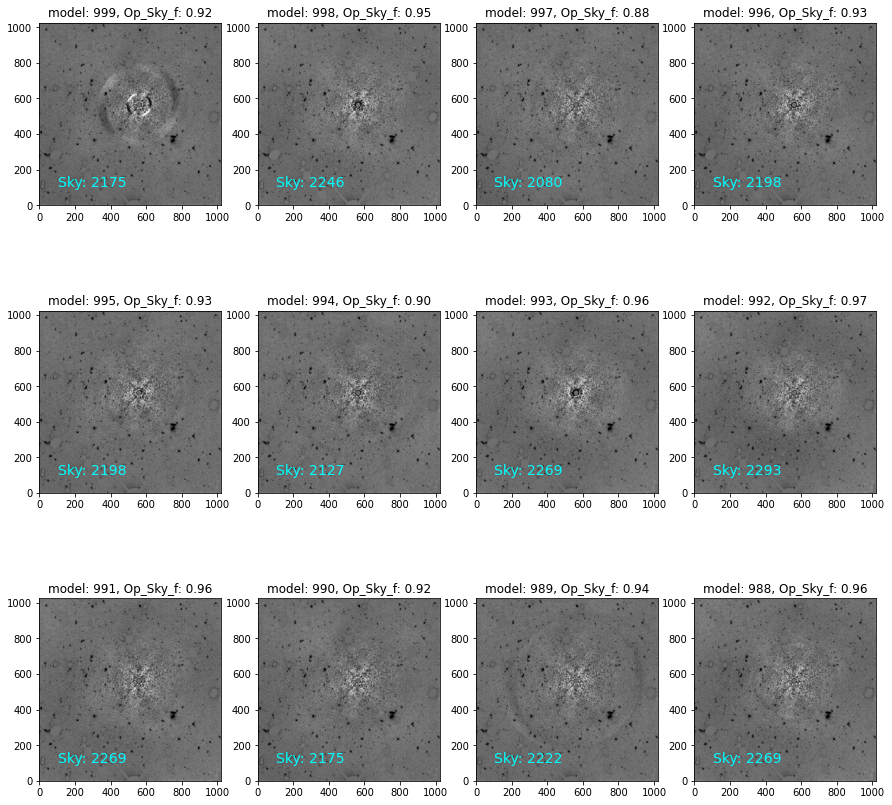

In [17]:
plot_scale = 'sqrt'    # 'log'
csv_name = objRoot+'/'+name+'_iterative_sky_optimizer.csv'

ncols = 4    # the number of panels in each row


if exists(csv_name):
    
    df = pd.read_csv(csv_name)
    for col in df.columns:
        df = df.rename(columns={col:col.strip()})
    
    n = len(df)
    nrows = n//ncols
    if n%ncols != 0: nrows += 1
    

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15)) 

    t = 0 
    for i in range(nrows):
        for j in range(ncols):
            
            if t>=n:
                continue

            ax = axes[i][j]
            model_no = df["model_no"][t]
            op_sky_f = df["final_sky_factor"][t]
            
            resid_file = objRoot+'/resid'+'.%03d'%model_no
            tv(fits_file=resid_file, ax=ax, options=plot_scale)
            
            ax.set_title("model: %d, Op_Sky_f: %.2f"%(model_no, op_sky_f))
            
            Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
            x0 = 0.9*Xlm[0]+0.1*Xlm[1]
            y0 = 0.9*Ylm[0]+0.1*Ylm[1]
            ax.text(x0, y0, "Sky: %d"%np.round(sky_med*op_sky_f), color="cyan", fontsize=14)
                
            t+=1
    
    print(df[["r0", "r1", "nr", "n_cross"]
             +[x for x in df.columns if 'final' in x]
             +["model_no"]])
    
    final_sky_factors = df["final_sky_factor"].values
    
    med_sky_factor = np.median(final_sky_factors)
    med_sky = np.round(np.median(final_sky_factors)*sky_med)
    std_sky = np.std(final_sky_factors*sky_med)
    
    print("[SKY factor] median: %.3f"%med_sky_factor)
    print("[SKY] median: %.d"%med_sky)
    print("[SKY] standard deviation : %d"%std_sky)

In [18]:
df

,r0,r1,nr,n_cross,sky_median,initial_sky_factor,final_sky_factor,final_sky,option,model_mask,model_no,object_root,residual_file,model_file,ellipse_file
0,13,322,26,3,2363.8,0.79,0.92,2172,COS3X=0,0,999,Outputs_u03396/u03396_d343d60ea411/,resid.999,model.999,elliprof.999
1,13,275,19,0,2363.8,0.80,0.95,2236,COS3X=0,999,998,Outputs_u03396/u03396_d343d60ea411/,resid.998,model.998,elliprof.998
2,14,375,33,1,2363.8,0.81,0.88,2087,COS3X=0,998,997,Outputs_u03396/u03396_d343d60ea411/,resid.997,model.997,elliprof.997
3,12,306,23,2,2363.8,0.80,0.93,2209,COS3X=0,997,996,Outputs_u03396/u03396_d343d60ea411/,resid.996,model.996,elliprof.996
4,8,350,24,2,2363.8,0.77,0.93,2206,COS3X=0,996,995,Outputs_u03396/u03396_d343d60ea411/,resid.995,model.995,elliprof.995
5,8,428,32,3,2363.8,0.91,0.90,2130,COS3X=0,995,994,Outputs_u03396/u03396_d343d60ea411/,resid.994,model.994,elliprof.994
6,9,237,16,3,2363.8,0.87,0.96,2274,COS3X=0,994,993,Outputs_u03396/u03396_d343d60ea411/,resid.993,model.993,elliprof.993
7,10,207,25,2,2363.8,0.84,0.97,2282,COS3X=0,993,992,Outputs_u03396/u03396_d343d60ea411/,resid.992,model.992,elliprof.992
8,14,277,22,0,2363.8,0.77,0.96,2262,COS3X=0,992,991,Outputs_u03396/u03396_d343d60ea411/,resid.991,model.991,elliprof.991
9,8,322,26,0,2363.8,0.87,0.92,2166,COS3X=0,991,990,Outputs_u03396/u03396_d343d60ea411/,resid.990,model.990,elliprof.990


In [19]:
## Internal parameters (sliders and setup)

params

{'backSextract': {'threshold': 0.03},
 'naiveSextract': {'minarea': 200.0, 'threshold': 3.0, 'smooth': 5.0},
 'basic_elliprof': {'r0': 9.0,
  'c_kron': 2.5,
  'sky_factor': 0.9,
  'k_ellipse': 15.0,
  'option': 'COS3X=0'},
 'second_elliprof': {'r0': 9.0,
  'c_kron': 2.5,
  'sky_factor': 0.9,
  'k_ellipse': 15.0,
  'option': 'COS3X=0',
  'minarea': 300.0,
  'threshold': 3.0,
  'smooth': 5.0,
  'renuc': 1.0}}